# 1. Install and Import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

# 5. Train from scratch

In [6]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --workers 2

Error decoding JSON from C:\Users\Guilherme\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Guilherme\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Guilherme\Documents\GitHub': No such file or directory
YOLOv5  2024-12-6 Python-3.12.3 torch-2.5.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

# 6. Load Custom Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Guilherme/.cache\torch\hub\master.zip
YOLOv5  2025-3-10 Python-3.12.3 torch-2.5.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [5]:
img = os.path.join('data', 'test', 'images', '2023-09-22-17-51-12_mp4-57_jpg.rf.82c98b433c4add67d74c75bdadaff338.jpg')

In [6]:
results = model(img)

C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [7]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 50.0ms pre-process, 78.0ms inference, 13.0ms NMS per image at shape (1, 3, 384, 640)


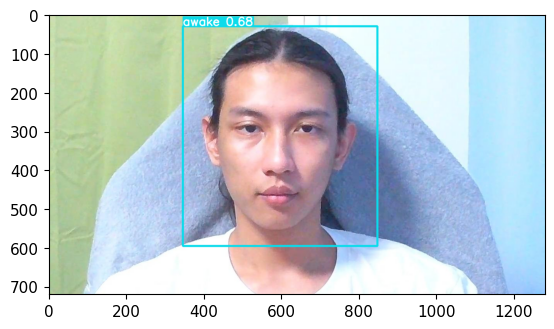

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
# Inicializar a câmera (use o índice correto para sua câmera)
cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Erro ao capturar o quadro.")
        break

    # 1. Rotacionar o frame 90 graus no sentido horário
    rotated_frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

    # 2. Processar o frame rotacionado no modelo YOLO
    results = model(rotated_frame)

    # 3. Renderizar os resultados
    rendered_frame = np.squeeze(results.render())  # Renderizar no frame rotacionado

    # 4. Exibir o frame rotacionado e processado
    cv2.imshow('YOLO', rendered_frame)

    # Fechar a janela ao pressionar a tecla 'q'
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Guilherme/.cache\torch\hub\ultralytics_

KeyboardInterrupt: 